### Central limit theorem: the distribution of the mean of many samples tends to Gaussian, independently of the underlying random variable distribution

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#simulate n dice rolls
n = 100000
roll_outcomes = np.random.randint(1, 7, n)
print('the mean roll outcome is: ', np.mean(roll_outcomes)) # expect 3.5
print('the std deviation of roll outcomes is: ', np.std(roll_outcomes)) # expect 1.7 from sqrt{[sum(i-3.5)^2]/6}

the mean roll outcome is:  3.50191
the std deviation of roll outcomes is:  1.715026633000199


In [11]:
#make 10000 random samples of 100 elements from the array
samples_number = 10000
sample_size = 1000
random_samples = np.zeros((samples_number,sample_size))
for i in range(samples_number):
    random_samples[i,:] = np.random.choice(roll_outcomes, size=sample_size, replace=False)

print('mean of one sample: ',np.mean(random_samples[10,:])) #expect 3.5 as mean of uniformly distributed values 
print('std of one sample: ',np.std(random_samples[10,:])) #expect 1.7 as std of uniformly distributed values 
sample_means = np.mean(random_samples, axis=1)
print('mean of the means of samples: ', np.mean(sample_means)) #expect 3.5 as mean of the means
print('std of the means of samples: ', np.std(sample_means)) #expect 1.7/sqrt(sample_size) as std of the means

mean of one sample:  3.566
std of one sample:  1.6963619896708366
mean of the means of samples:  3.5018236000000003
std of the means of samples:  0.05376741097579462


##### The uncertainty on the means depends on the sample_size. The uncertainty on the std of the means depends on the sample_number. 
##### If we extract only 20 samples, the true value estimate will still be 1.7/sqrt(sample_size) but the uncertainty will be larger and np.std(sample_means) will yield values that are generally not as close to 1.7/sqrt(sample_size) as when simulating 10000.

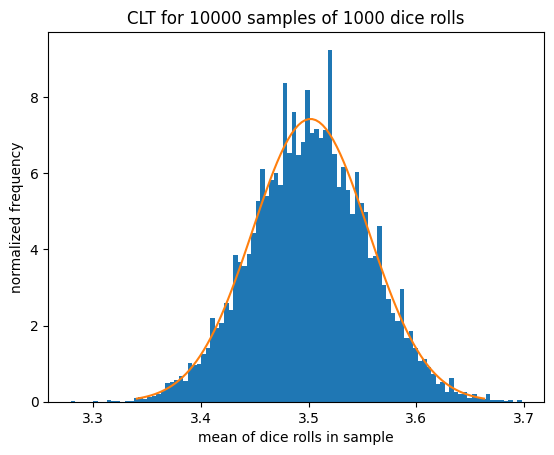

The mean distribution is Gaussian because the mean is the sum of independent identically distributed random variables.
The standard deviation of the mean distribution is equal to the uncertainty on the outcome divided by the sqrt of the sample size:  0.05376741097579462


In [12]:
##now show that the CL theorem holds for these samples of the population
plt.hist(sample_means, bins=100, density=True)
plt.xlabel('mean of dice rolls in sample')
plt.ylabel('normalized frequency')
plt.title(f'CLT for {samples_number} samples of {sample_size} dice rolls')
mu=np.mean(sample_means)
sigma=np.std(sample_means)
plt.plot(np.linspace(mu-3*sigma, mu+3*sigma, 100), np.exp(-((np.linspace(mu-3*sigma, mu+3*sigma, 100)-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)))
plt.show()
print('The mean distribution is Gaussian because the mean is the sum of independent identically distributed random variables.')
print('The standard deviation of the mean distribution is equal to the uncertainty on the outcome divided by the sqrt of the sample size: ', np.std(sample_means))

##### Changing sample_size and sample_number will affect how close to Gaussian the distribution of the means is, and the uncertainties on the mean and means' std dev.

### The roll outcome distribution is uniform (if the die is fair). What if we consider a random variable with a different pdf?

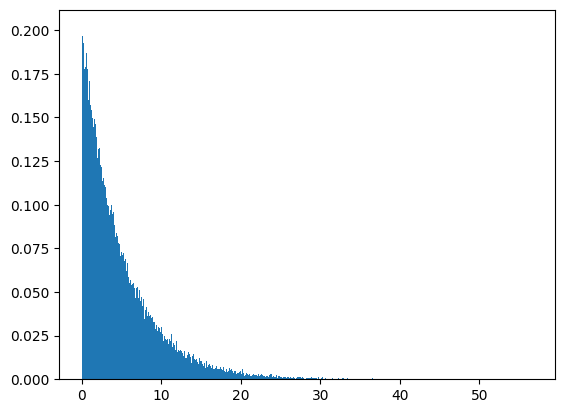

In [13]:
#simulate 100000 time intervals exponentially distributed with scale (1/lambda) 5
scale = 5.0
time_intervals = np.random.exponential(scale, 100000)

# Plot a histogram to visualize the distribution
plt.hist(time_intervals, bins=1000, density=True)
plt.show()

In [14]:
samples_number = 10000
sample_size = 1000
random_samples = np.zeros((samples_number,sample_size))
for i in range(samples_number):
    random_samples[i,:] = np.random.choice(time_intervals, size=sample_size, replace=False)

print('mean of one sample: ',np.mean(random_samples[10,:])) #expect scale (1/lambda) as mean of exponentially distributed values
print('std of one sample: ',np.std(random_samples[10,:])) #expect scale (1/lambda) as std of exponentially distributed values
sample_means = np.mean(random_samples, axis=1)
print('mean of the means of samples: ', np.mean(sample_means)) #expect scale (1/lambda) as mean of exponentially distributed values
print('std of the means of samples: ', np.std(sample_means)) #expect scale/sqrt(sample_size) as std of the means

mean of one sample:  5.013171406252368
std of one sample:  4.891745718345413
mean of the means of samples:  4.998191583714001
std of the means of samples:  0.15808897844272163


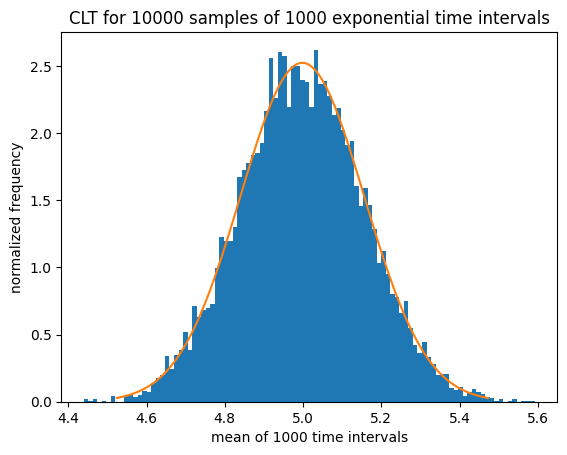

The mean distribution is Gaussian because the mean is the sum of independent identically distributed random variables
The standard deviation of the mean distribution is equal to the uncertainty on the outcome divided by the sqrt of the sample size:  0.15808897844272163


In [15]:
#now show that the CL theorem holds for these samples of the population
plt.hist(sample_means, bins=100, density=True)
plt.xlabel('mean of 1000 time intervals')
plt.ylabel('normalized frequency')
plt.title('CLT for 10000 samples of 1000 exponential time intervals')
mu=np.mean(sample_means)
sigma=np.std(sample_means)
plt.plot(np.linspace(mu-3*sigma, mu+3*sigma, 100), np.exp(-((np.linspace(mu-3*sigma, mu+3*sigma, 100)-mu)**2)/(2*sigma**2))/(sigma*np.sqrt(2*np.pi)))
plt.show()
print('The mean distribution is Gaussian because the mean is the sum of independent identically distributed random variables')
print('The standard deviation of the mean distribution is equal to the uncertainty on the outcome divided by the sqrt of the sample size: ', np.std(sample_means))

### The CLT holds provided the sampled random variables are independent and identically distributed.